In [18]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import auc,roc_auc_score, accuracy_score, confusion_matrix, f1_score, precision_score, \
recall_score, matthews_corrcoef, precision_recall_curve
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
pd.set_option('display.max_columns', 100)

In [19]:
#read the data
train_original=pd.read_csv("C:/Users/singh/Desktop/LockDown/Porto Seguro/train.csv")
test_original=pd.read_csv("C:/Users/singh/Desktop/LockDown/Porto Seguro/test.csv")

In [20]:
train=train_original.copy()#create a copy
test=test_original.copy()
train.shape, test.shape

((595212, 59), (892816, 58))

In [21]:
train.head() #postfix bin indicate binary features and cat indicate categorical features.
# Features without these designations are either continuous or ordinal.
# Values of -1 indicate that the feature was missing from the observation.
# Features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc).

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [22]:
#find if duplicates rows exist
print(sum(train.duplicated())) #0 overall duplicate rows
print(sum(train.duplicated(subset='id'))) # 0 duplicates on ID in train

0
0


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [24]:
#No Object seen, as categorical variables are assigned int values. they have a postfix of cat

### Metadata

In [25]:
#for better data management, lets create a DF called meta

In [26]:
level=[]
for feature in train.columns:
    
    if 'cat' in feature or feature=='id':
        level.append('nominal')
    elif 'bin' in feature or feature=='target':
        level.append('binary')
    elif train[feature].dtypes=='int64':
        level.append('ordinal')
    elif train[feature].dtypes=='float64':
        level.append('interval')
        
meta=pd.DataFrame(level,columns=['level'])

In [27]:
meta['role']=['id' if feature=='id' else 'target' if feature=='target' else 'input' for feature in train.columns]
meta.index=train.columns
meta['keep']=True
meta.loc['id','keep']=False
meta['dtype']=[train[feature].dtype for feature in train.columns]

In [28]:
meta.head()

,level,role,keep,dtype
id,nominal,id,False,int64
target,binary,target,True,int64
ps_ind_01,ordinal,input,True,int64
ps_ind_02_cat,nominal,input,True,int64
ps_ind_03,ordinal,input,True,int64


In [29]:
meta[(meta.level == 'nominal') & (meta.keep)].index #example to extract all Nominal Variables

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [30]:
#count how many variables of each type exist
pd.DataFrame({'count': meta.groupby(['role','level'])['role'].count()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


### Descriptive statistics

#### Interval variables

In [31]:
interval_varaibles=meta[(meta['level']=='interval') & (meta.keep)].index
train[interval_varaibles].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


#### Ordinal variables

In [32]:
ordinal_variables=meta[(meta['level']=='ordinal')&(meta.keep)].index

In [33]:
train[ordinal_variables].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


#### Binary variables

In [34]:
binary_variables=meta[(meta['level']=='binary')&(meta.keep)].index
train[binary_variables].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### missing values

In [35]:
var_with_Nulls=[]

for f in train.columns:
    if sum(train[f]==-1)>0:
        var_with_Nulls.append(f)
        print('Variable {} has {} rows Missing. Proportion of Missing is {:.2%} '.format(f,sum(train[f]==-1),sum(train[f]==-1)/train.shape[0]))

Variable ps_ind_02_cat has 216 rows Missing. Proportion of Missing is 0.04% 
Variable ps_ind_04_cat has 83 rows Missing. Proportion of Missing is 0.01% 
Variable ps_ind_05_cat has 5809 rows Missing. Proportion of Missing is 0.98% 
Variable ps_reg_03 has 107772 rows Missing. Proportion of Missing is 18.11% 
Variable ps_car_01_cat has 107 rows Missing. Proportion of Missing is 0.02% 
Variable ps_car_02_cat has 5 rows Missing. Proportion of Missing is 0.00% 
Variable ps_car_03_cat has 411231 rows Missing. Proportion of Missing is 69.09% 
Variable ps_car_05_cat has 266551 rows Missing. Proportion of Missing is 44.78% 
Variable ps_car_07_cat has 11489 rows Missing. Proportion of Missing is 1.93% 
Variable ps_car_09_cat has 569 rows Missing. Proportion of Missing is 0.10% 
Variable ps_car_11 has 5 rows Missing. Proportion of Missing is 0.00% 
Variable ps_car_12 has 1 rows Missing. Proportion of Missing is 0.00% 
Variable ps_car_14 has 42620 rows Missing. Proportion of Missing is 7.16% 


In [36]:
#ps_car_03_cat (69%) and ps_car_05_cat(45%) have a large proportion of records with missing values. Remove these variables.
meta.loc[['ps_car_03_cat','ps_car_05_cat'],'keep']=False

In [37]:
# Imputing with the mean or mode
train['ps_reg_03'].fillna(value=train['ps_reg_03'].median(),inplace=True)
train['ps_car_11'].fillna(value=train['ps_car_11'].mode()[0],inplace=True)
train['ps_car_12'].fillna(value=train['ps_car_12'].median(),inplace=True)
train['ps_car_14'].fillna(value=train['ps_car_14'].median(),inplace=True)


#### Cardinality of the categorical variables

In [38]:
#Cardinality or Number of Levels in the Categorical variable. This is large will result into too many Dummy Variables
nominal_variables=meta[(meta.level=='nominal') & (meta.keep)].index
for f in nominal_variables:
    print('Variable {} has {} distinct levels'.format(f,train[f].value_counts().shape[0]))

Variable ps_ind_02_cat has 5 distinct levels
Variable ps_ind_04_cat has 3 distinct levels
Variable ps_ind_05_cat has 8 distinct levels
Variable ps_car_01_cat has 13 distinct levels
Variable ps_car_02_cat has 3 distinct levels
Variable ps_car_04_cat has 10 distinct levels
Variable ps_car_06_cat has 18 distinct levels
Variable ps_car_07_cat has 3 distinct levels
Variable ps_car_08_cat has 2 distinct levels
Variable ps_car_09_cat has 6 distinct levels
Variable ps_car_10_cat has 3 distinct levels
Variable ps_car_11_cat has 104 distinct levels


In [39]:
#ps_car_11_cat has too many. Lets see its counts
train['ps_car_11_cat'].value_counts().head()

104    85083
103    24262
64     22278
87     17106
32     12578
Name: ps_car_11_cat, dtype: int64

In [40]:
#like jitter function of Tableau
def add_noise(series, noise_level):#Noise Level should be a Proportion (0-1, 0.01 means 1%)
    return series * (1 + noise_level * np.random.randn(len(series)))

In [41]:
def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
   This handles missing values as just another value and computes the encoding like it does for any other value of the variables
   The parameter smoothing provides control over the slope of the function around the inflexion point.
   The parameter k determines half of the minimal sample size for which we completely "trust" the estimate based on the sample
   in the cell. OR minimum samples to take category average into account
    """
    
    assert len(trn_series) == len(target) #used for debugging, can dislay a error message when error
    assert trn_series.name == tst_series.name #checking if they are the same variable
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)   

In [42]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
#train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
# test.drop('ps_car_11_cat', axis=1, inplace=True)

#### Data Visualization

In [43]:
train[['ps_ind_02_cat', 'target']].groupby(['ps_ind_02_cat'],as_index=False).mean()

,ps_ind_02_cat,target
0,-1,0.185185
1,1,0.035725
2,2,0.038139
3,3,0.037217
4,4,0.040780


<Figure size 432x288 with 0 Axes>

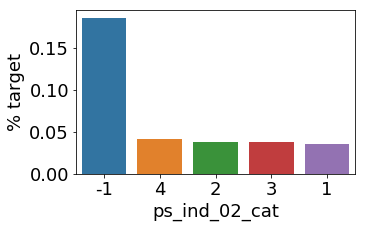

<Figure size 432x288 with 0 Axes>

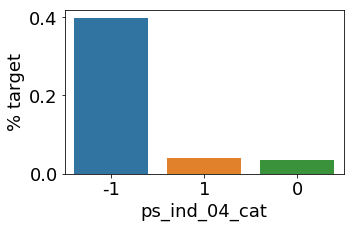

<Figure size 432x288 with 0 Axes>

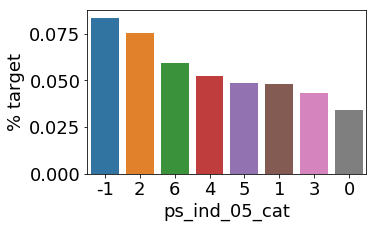

<Figure size 432x288 with 0 Axes>

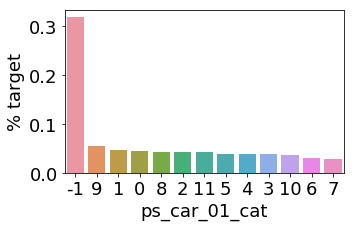

<Figure size 432x288 with 0 Axes>

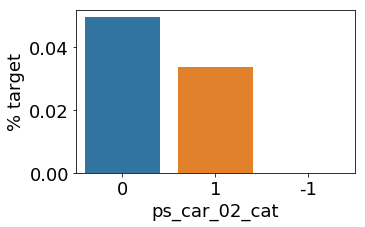

<Figure size 432x288 with 0 Axes>

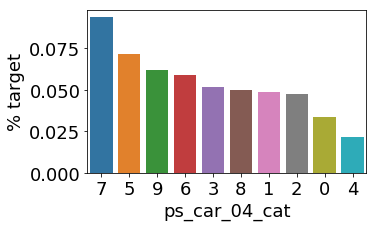

<Figure size 432x288 with 0 Axes>

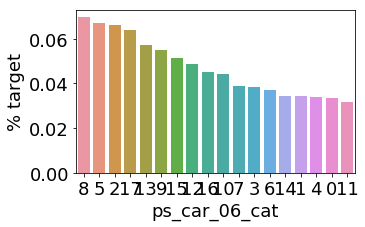

<Figure size 432x288 with 0 Axes>

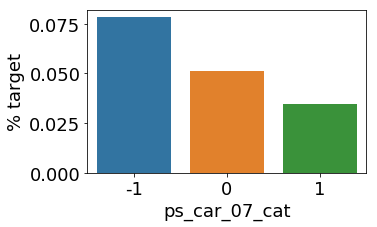

<Figure size 432x288 with 0 Axes>

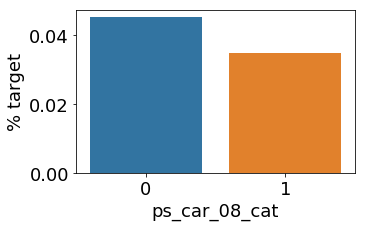

<Figure size 432x288 with 0 Axes>

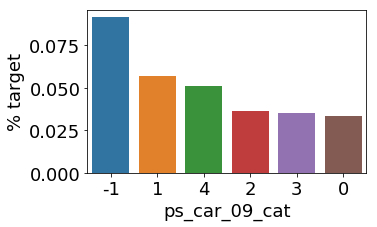

<Figure size 432x288 with 0 Axes>

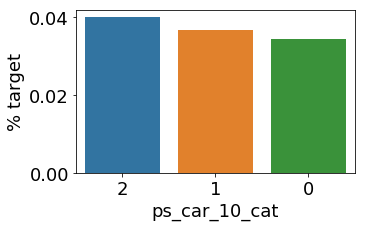

In [44]:
#Categorical variables
nominal_variables=meta[(meta.level=='nominal') & (meta.keep==True)].index

for f in nominal_variables:
    plt.figure()
    fig, ax = plt.subplots(figsize=(5,3))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

In [45]:
#So the decision to not impute Missing values (-1) was good. We can see higher Proportion of 1's for -1 than for other vales

In [46]:
#Interval variables
interval_varaibles #meta[(meta.level=='interval') & (meta.keep==True)].index

#Checking the correlations between interval variables. A heatmap is a good way to visualize the correlation between variables.

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

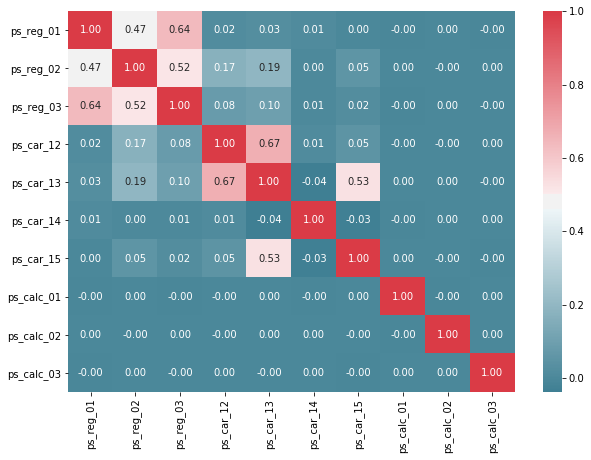

In [47]:
plt.subplots(figsize=(10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[interval_varaibles].corr(),annot=True,fmt='.2f',cmap=cmap);

In [48]:
#The linear plots in sns take a long time. To avoid this, lets take a sample from train 
s=train.sample(frac=0.2)

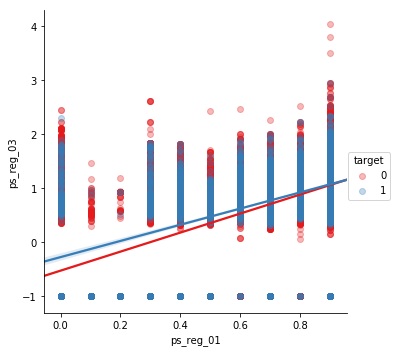

In [49]:
sns.lmplot(x='ps_reg_01', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

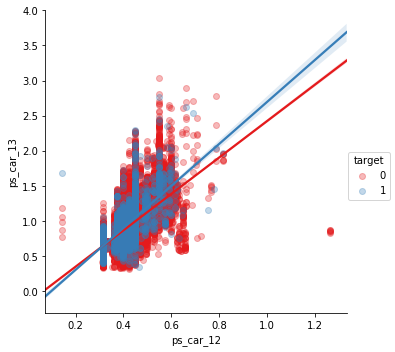

In [50]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

In [51]:
#How can we decide which of the correlated variables to keep? We could perform Principal Component Analysis (PCA)
#on the variables to reduce the dimensions.But as the number of correlated variables is rather low, we will let 
#the model do the heavy-lifting.

In [52]:
#ordinal variables
ordinal_variables #meta[(meta.level=='ordinal') &(meta.keep==True)].index

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',
       'ps_calc_14'],
      dtype='object')

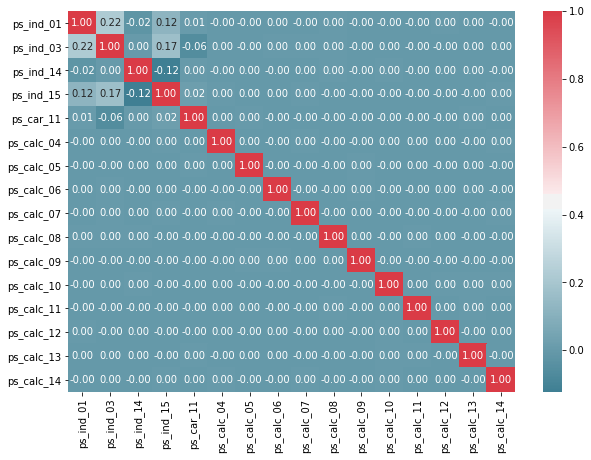

In [53]:
plt.subplots(figsize=(10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[ordinal_variables].corr(),annot=True,fmt='.2f',cmap=cmap);

In [54]:
#For the ordinal variables we do not see many correlations. 

### Feature engineering

In [55]:
nominal_variables= meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=nominal_variables, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 60 variables in train
After dummification we have 112 variables in train


#### interaction variables

In [56]:
#lets collect 2 degree and interaction of all interval variables
from sklearn.preprocessing import PolynomialFeatures
print(len(interval_varaibles))
higher_order=PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
interactions=pd.DataFrame(data=higher_order.fit_transform(train[interval_varaibles]),columns=higher_order.get_feature_names(interval_varaibles))
print(interactions.shape)
#drop the original variables
interactions.drop(interval_varaibles,axis=1,inplace=True)
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

10
(595212, 65)
Before creating interactions we have 112 variables in train
After creating interactions we have 167 variables in train


### Feature selection

In [57]:
#remove features with no or a very low variance.
#Use SKlearns VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1))
selector.get_support()
# Fit to train without id and target variables
# .get_support() gives array of T/F. True means Var is Good.

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [58]:
f = np.vectorize(lambda x : not x)
v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

26 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_0', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2']


In [59]:
#lets delete the above variables from train
train.drop(v,axis=1,inplace=True)
train.shape

(595212, 141)

In [60]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

In [61]:
feat_labels = X_train.columns
rf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
importances[0:5]

array([0.00908122, 0.0126856 , 0.00191804, 0.00221517, 0.00199595])

In [62]:
indices=np.argsort(importances)[::-1]#Variables importances in Decresing order
indices[0:5]

array([ 18, 118, 119,  89, 112], dtype=int64)

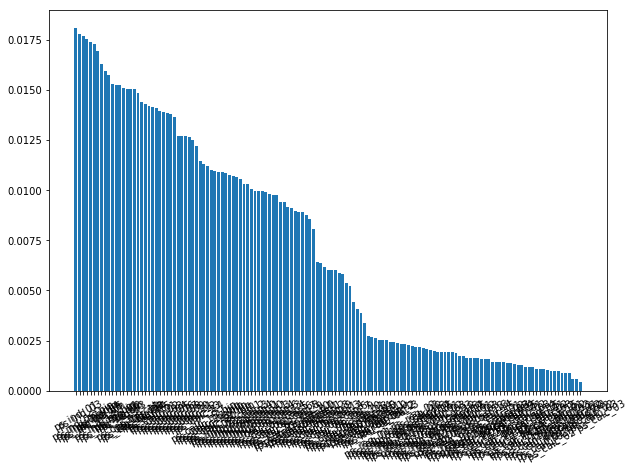

In [63]:
plt.subplots(figsize=(10,7))
plt.bar(range(len(indices)),importances[indices]);
plt.xticks(range(len(indices)),feat_labels,rotation=30);
plt.show()
#hardly anythg is visible

In [64]:
from sklearn.feature_selection import SelectFromModel
selector=SelectFromModel(rf,threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))

Number of features before selection: 139


In [65]:
n_features = selector.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))

Number of features after selection: 70


In [66]:
selected_vars = list(feat_labels[selector.get_support()])
new_train = train[selected_vars + ['target']]
new_train.shape

(595212, 71)

In [69]:
test.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'ps_car_11_